#### Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.05 Computing Magnitude and Phase </font>

# <font color=red>LITERACY</font>

### Setup

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
import pandas as pd
from scipy.fft import fft, fftfreq
import math

import warnings
warnings.filterwarnings('ignore')

# Figure size and general parameters
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b"): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    

def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
DURATION = 1    
#function to create frequency domain figure
#one waveform
def make_plot_freq_1(x1,SAMPLE_RATE): 
    N = SAMPLE_RATE * DURATION
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / SAMPLE_RATE)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf)) 

## <font color=red>L1) Computing Magnitude</font>

Take a look at this timeseries and the magnitude calculation.

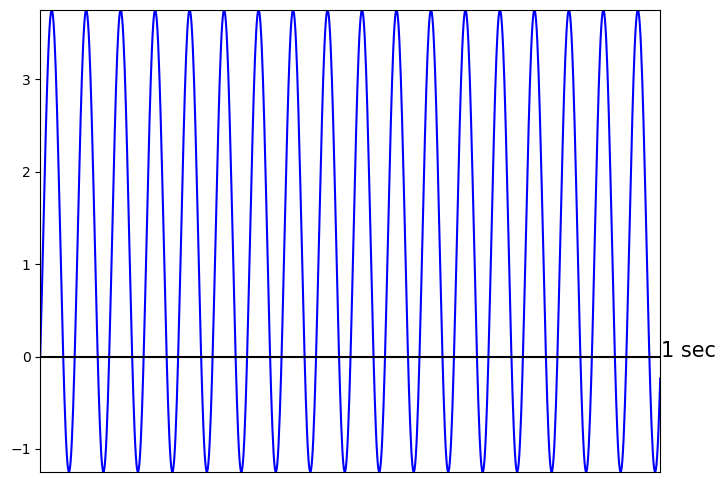

In [2]:
time = np.arange(0,1,0.001)
freq = 9
timeseries = 5 * np.sin(2*np.pi * freq * time + np.pi/3) * np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

In [3]:
from scipy.integrate import quad

def integrand(x):
    return 5 * np.sin(2*np.pi * freq * x+np.pi/3) * np.sin(2*np.pi * freq * x)

magnitude = quad(integrand, 0, 1)[0] / 0.5
round(magnitude,4)

2.5

Whereas the magnitude calculation indicates that the magnitude of 9 Hz activity is 2.5, the timeseries formula indicates that the gain value is 5.

What information does the calculated 2.5 magnitude value provide?

## <font color=red>L2) Computing Magnitude</font>

Take a look at this timeseries and the magnitude calculation.

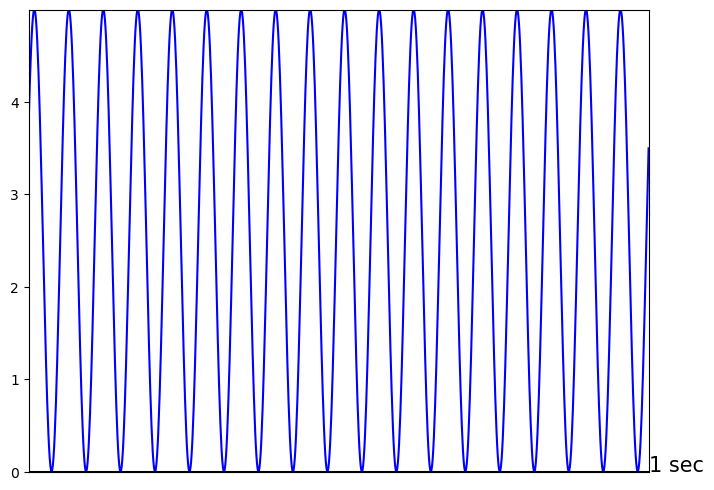

In [5]:
time = np.arange(0,1,0.001)
freq = 9
timeseries =5 * np.sin(2*np.pi * freq * time + np.pi/3) * np.sin(2*np.pi * freq * time + np.pi/3)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

In [7]:
from scipy.integrate import quad

def integrand(x):
    return 5 * np.sin(2*np.pi * freq * x + np.pi/3) * np.sin(2*np.pi * freq * x + np.pi/3)

magnitude = quad(integrand, 0, 1)[0] / 0.5
round(magnitude,4)

5.0

The magnitude value is correctly measured. Compared to the first problem, what change was required
to obtain the correct magnitude value? Why did that work?

## <font color=red>L3) Computing Magnitude</font>

Look at this timeseries and magnitude calculation.

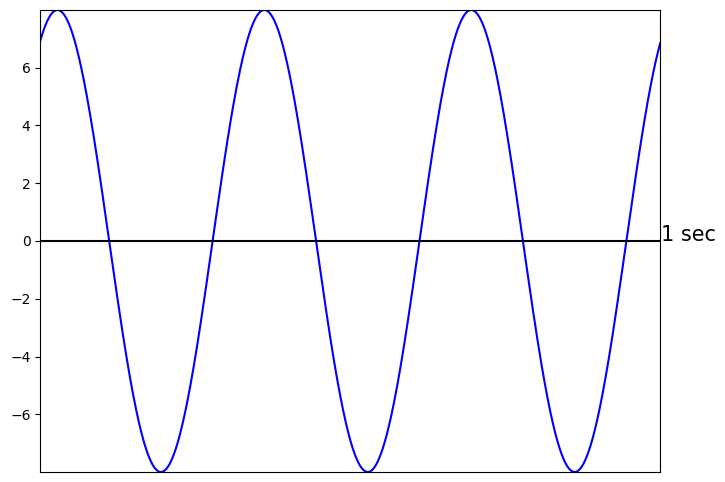

In [8]:
time = np.arange(0,1,0.001)
freq = 3
timeseries = 8 * np.sin(2*np.pi * freq * time + np.pi/3) 

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the sine and cosine magnitude components.

In [9]:
from scipy.integrate import quad

def integrand(x):
    return 8 * np.sin(2*np.pi * freq * x + np.pi/3) * np.sin(2*np.pi * freq * x)

sinepart = quad(integrand, 0, 1)[0] / 0.5
round(sinepart,5)

4.0

In [10]:
from scipy.integrate import quad

def integrand(x):
    return 8 * np.sin(2*np.pi * freq * x + np.pi/3) * np.cos(2*np.pi * freq * x)

cosinepart = quad(integrand, 0, 1)[0] / 0.5
round(cosinepart,5)

6.9282

Calculate the magnitude of 3 Hz activity.

In [11]:
round(np.sqrt(sinepart**2 + cosinepart**2))

8

The magnitude value is correct. Why does this procedure work?

## <font color=red>L4) Computing Magnitude</font>

Look at this timeseries and magnitude calculation.

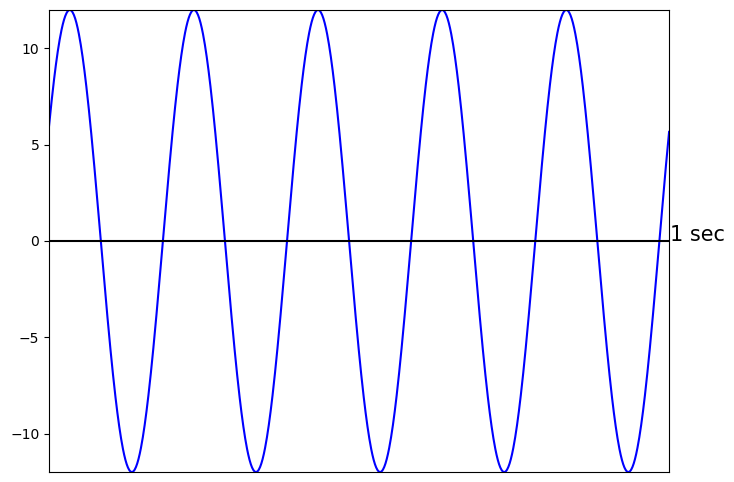

In [12]:
time = np.arange(0,1,0.001)
freq = 5
timeseries = 12 * np.sin(2*np.pi * freq * time + np.pi/6)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the sine and cosine component.

In [13]:
from scipy.integrate import quad

def integrand(x):
    return 12 * np.sin(2*np.pi * freq * x + np.pi/6) * np.sin(2*np.pi * 3 * x)

sinepart = quad(integrand, 0, 1)[0] / 0.5
round(sinepart,5)

-0.0

In [14]:
from scipy.integrate import quad

def integrand(x):
    return 12 * np.sin(2*np.pi * freq * x + np.pi/6) * np.cos(2*np.pi * 3 * x)

cosinepart = quad(integrand, 0, 1)[0] / 0.5
round(cosinepart,5)

-0.0

Calculate the magnitude.

In [15]:
round(np.sqrt(sinepart**2 + cosinepart**2))

0

The magnitude value is incorrect. What is wrong?

## <font color=red>L5) Computing Magnitude</font>

Look at this timeseries and magnitude calculation.

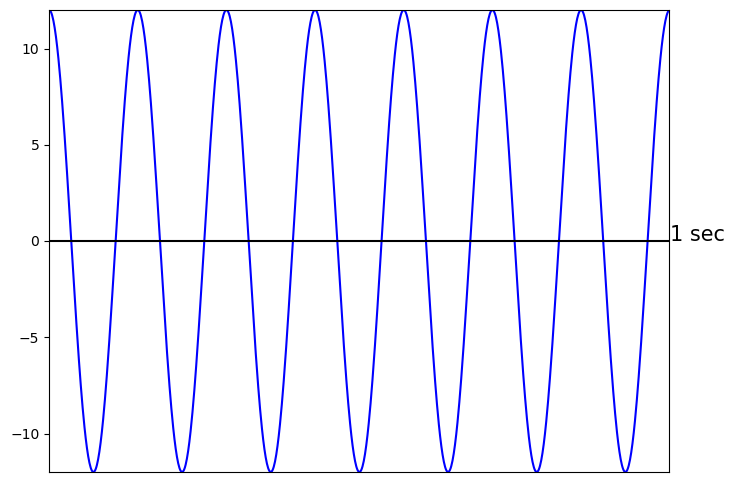

In [16]:
time = np.arange(0,1,0.001)
freq = 7
timeseries =12 * np.sin(2*np.pi * freq * time + np.pi/2) 

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the sine and cosine component.

In [17]:
from scipy.integrate import quad

def integrand(x):
    return 12 * np.sin(2*np.pi * freq * x + np.pi/2) * np.sin(2*np.pi * 7 * x)

sinepart = quad(integrand, 0, 1)[0] / 0.5
round(sinepart,5)

-0.0

In [18]:
from scipy.integrate import quad

def integrand(x):
    return 12 * np.sin(2*np.pi * freq * x + np.pi/2) * np.cos(2*np.pi * 7 * x)

cosinepart = quad(integrand, 0, 1)[0] / 0.5
round(cosinepart,5)

12.0

Calculate the magnitude of 1 Hz activity.

In [19]:
round(np.sqrt(sinepart**2 + cosinepart**2))

12

The magnitude value is correct, but sinepart = 0. Why does sinepart = 0?

## <font color=red>L6) Computing Magnitude</font>

Look at this timeseries and magnitude calculation.

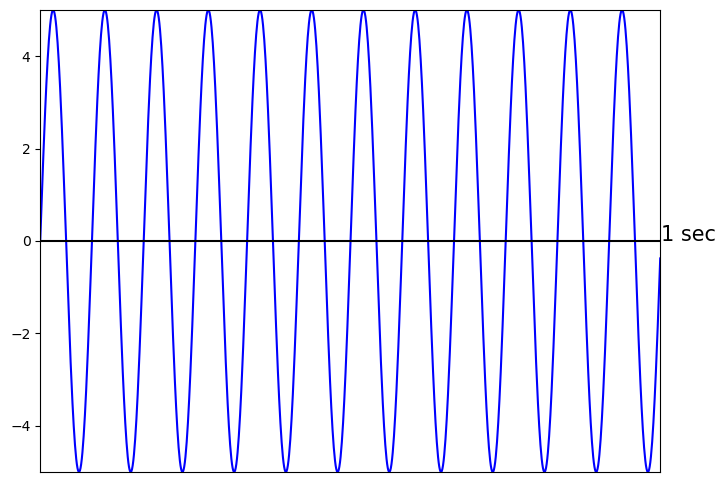

In [20]:
time = np.arange(0,1,0.001)
freq = 12
timeseries =5 * np.sin(2*np.pi * freq * time + 2*np.pi)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the sine and cosine component.

In [21]:
from scipy.integrate import quad

def integrand(x):
    return 5 * np.sin(2*np.pi * freq * x + np.pi*2)* np.sin(2*np.pi * 12 * x) 

sinepart = quad(integrand, 0, 1)[0] / 0.5
round(sinepart,5)

5.0

In [22]:
from scipy.integrate import quad

def integrand(x):
    return 5 * np.sin(2*np.pi * freq * x + np.pi*2)* np.cos(2*np.pi * 12 * x) 

cosinepart = quad(integrand, 0, 1)[0] / 0.5
round(cosinepart,5)

-0.0

Calculate the magnitude of 1 Hz activity.

In [23]:
round(np.sqrt(sinepart**2 + cosinepart**2))

5

The magnitude value is correct, but cosinepart = 0. Why does cosinepart = 0?

## <font color=red>L7) Computing Magnitude</font>

Look at this timeseries and magnitude calculation.

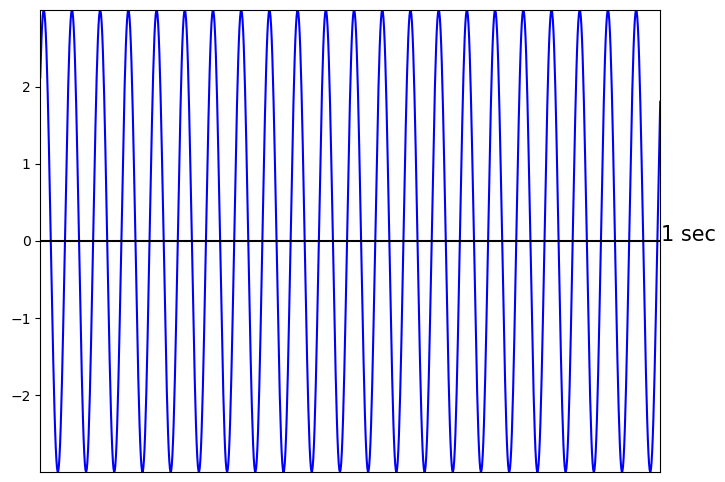

In [24]:
time = np.arange(0,1,0.001)
freq = 22
timeseries =3 * np.sin(2*np.pi * freq * time + np.pi/4) 

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the sine and cosine component.

In [25]:
from scipy.integrate import quad

def integrand(x):
    return 3 * np.sin(2*np.pi * freq * x + np.pi/4)* np.sin(2*np.pi * 22 * x) 

sinepart = quad(integrand, 0, 1)[0] / 0.5
round(sinepart,5)

2.12132

In [26]:
from scipy.integrate import quad

def integrand(x):
    return 3 * np.sin(2*np.pi * freq * x + np.pi/4)* np.cos(2*np.pi * 22 * x) 

cosinepart = quad(integrand, 0, 1)[0] / 0.5
round(cosinepart,5)

2.12132

Calculate the magnitude of 1 Hz activity.

In [27]:
round(np.sqrt(sinepart**2 + cosinepart**2))

3

The magnitude value is correct. Sinepart = Cosinepart. Why?

## <font color=red>L8) Identities</font>

Express sine and cosine functions via complex exponentials.

## <font color=red>L9) Identities</font>

Write $e^{iω x}$ in terms of sine and cosine.

## <font color=red>L10) Complex Exponentials</font>

When using $e^{iω x}$ to calculate magnitude and phase values, what does the variable ω represent?

## <font color=red>L11) Computing Magnitude</font>

Here is a complex value: z = 3 + 4i.
    
Calculate the magnitude of this complex value and create a graph with this vector.

While you are at it, place the following labels on the plot: Abs[z], ArcTan[z], Real, Imaginary, Cos[x],
ⅈSin[x].

## <font color=red>L12) Computing Magnitude and Phase</font>

To compute the magnitude and phase, which complex exponential term is better: $e^{-iω x}$ or  $e^{iω x}$?

## <font color=red>L13) Computing Magnitude and Phase</font>

Look at this spatial pattern.

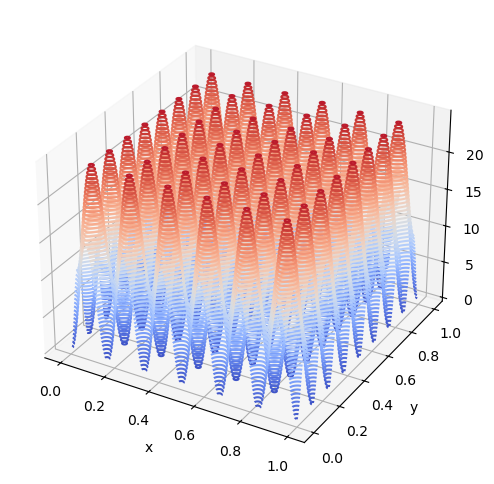

In [28]:
x = np.arange(0,1, 0.001)
y = np.arange(0,1, 0.001)
X, Y = np.meshgrid(x, y)
Z = 15*np.sin(2*np.pi * 3 * X)*np.sin(2*np.pi * 3 * X) +  10*np.sin(2*np.pi * 4 * Y)*np.sin(2*np.pi * 4 * Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
make_plot_3d(ax,X,Y,Z)

Here is the same spatial pattern from a different angle - a view with the x-axis facing us.

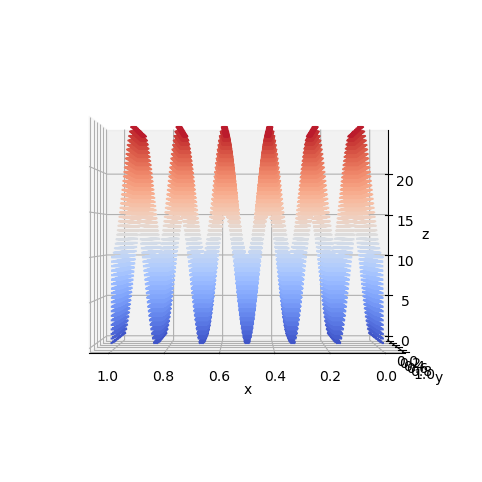

In [29]:
ax.view_init(0, 90)
fig

There are 6 peaks. Why?

In addition, why is the spatial pattern above the zero line?

## <font color=red>L14) Spatial Patterns</font>

Here is a spatial pattern.

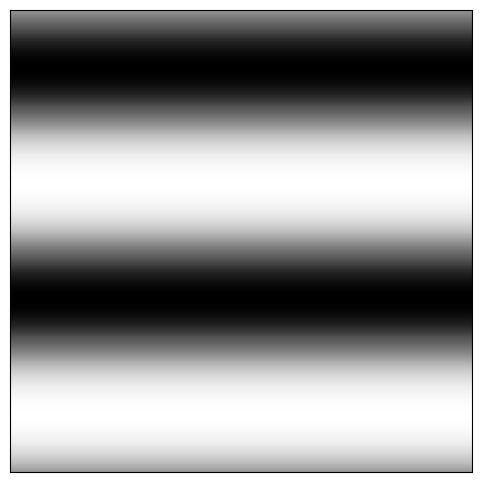

In [30]:
x = np.arange(0,1, 0.001)
y = np.arange(1,0, -0.001)

X, Y = np.meshgrid(x, y)
Z = 3*np.sin(2*np.pi * 3 * X + np.pi) +  3*np.sin(2*np.pi * 3 * X) + 4*np.sin(2*np.pi * 2 * Y) 

make_imshow(Z)
plt.show()

There is clearly 2 Hz activity in the y-axis direction. The combined[x,y] formula might suggest there also should be 3 Hz activity. Why don't we see 3 Hz activity? 

## <font color=red>L15) Spatial Patterns</font>

Stay with the example above.

In [31]:
spectrum = sum(3*np.sin(2*np.pi * 3 * x + np.pi) * np.exp(2*np.pi * 3j * x) )*0.001 / 0.5
round(np.real(spectrum),4) + 1j*round(np.imag(spectrum),4) 

-3j

In [32]:
spectrum = sum(3*np.sin(2*np.pi * 3 * x) * np.exp(2*np.pi * 3j * x) )*0.001 / 0.5
round(np.real(spectrum),4) + 1j*round(np.imag(spectrum),4) 

3j

In [33]:
spectrum = sum(4*np.sin(2*np.pi * 2 * y) * np.exp(2*np.pi * 2j * y) )*0.001 / 0.5
round(np.real(spectrum),4) + 1j*round(np.imag(spectrum),4) 

4j

Do the calculations confirm what you said in the last problem? How?

## <font color=red>L16) Spatial Patterns</font>

Stay with the example above.

Look at this.

In [34]:
spectrum = sum((3*np.sin(2*np.pi * 3 * x + np.pi)+3*np.sin(2*np.pi * 3 * x)) * np.exp(2*np.pi * 2j * y) )*0.001 / 0.5
round(np.real(spectrum),4) + 1j*round(np.imag(spectrum),4) 

(-0+0j)

Does the above calculation confirm what you saw and said above?

## <font color=red>L17) Calculating Magnitude - Timeseries with noise</font>

Here is a 75 Hz signal with noise (over a 1 second interval, a sample is collected every 0.002 seconds =
1/500).

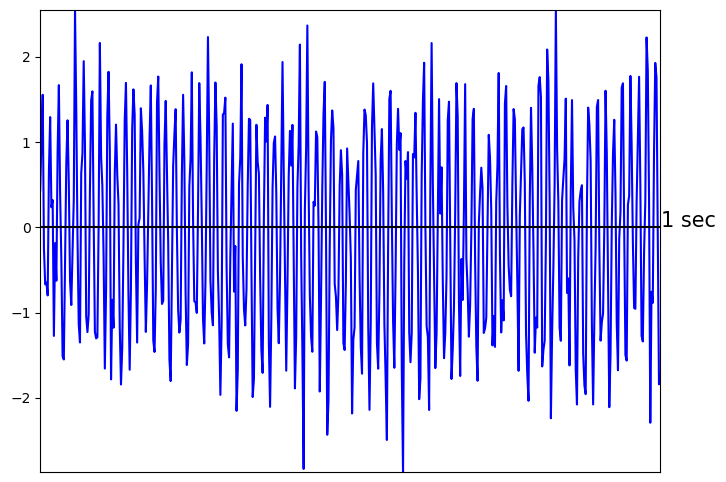

In [37]:
time = np.arange(0,1,1/500)
freq = 75
noise = np.random.normal(0,0.5,len(time))
timeseries = 1.5 * np.sin(2*np.pi * freq * time) + noise

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the magnitude of 75 Hz activity in the above timeseries.

In [38]:
complex_amplitude = np.exp(2*np.pi * 75j * time)
spectrum = round(sum(timeseries * complex_amplitude)*1/500,4) / 0.5
abs(spectrum)

1.5090212059477495

The output of the 'abs' function tells us that the magnitude of 75 Hz activity is approximately 1.5. 

Look at this plot.

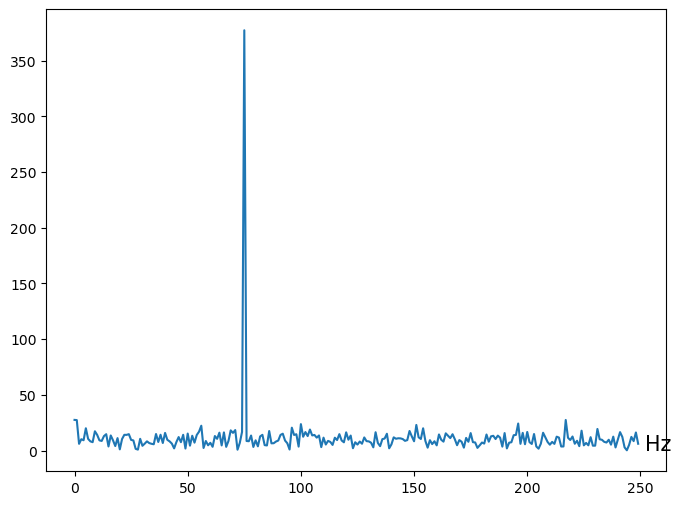

In [39]:
timeseries = 1.5 * np.sin(2*np.pi * freq * time) + noise
make_plot_freq_1(timeseries,500)

plt.text(252,0,'Hz',fontsize=15)
plt.show()

Examine this plot and write a sentence describing what is plotted. Also, write a sentence or two saying
whether you think the estimate of 75 Hz activity is or is not just a measure of noise.